## Visualize simulated data

Data simulation adapted from DestVI [[1]](https://doi.org/10.1101/2021.05.10.443517)


[[1] Lopez, Romain, Baoguo Li, Hadas Keren-Shaul, Pierre Boyeau, Merav Kedmi, David Pilzer, Adam Jelinski et al. "Multi-resolution deconvolution of spatial transcriptomics data reveals continuous patterns of inflammation." bioRxiv (2021).](https://doi.org/10.1101/2021.05.10.443517)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
sys.path.insert(0, 
                '{}/lib/python{}.{}/site-packages'.format(sys.prefix,sys.version_info.major, sys.version_info.minor))


In [3]:
import pandas as pd
import numpy as np
import scanpy as sc

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

## read data

In [5]:
path = "/lustre/groups/ml01/workspace/giovanni.palla/moscot_benchmarks/simulated_data/"

sc_adata = sc.read(path + "sc_simu.h5ad")
st_adata = sc.read(path + "st_simu.h5ad")

In [6]:
sc_adata.layers["original"] = sc_adata.X.copy()
st_adata.layers["original"] = st_adata.X.copy()

In [7]:
st_adata.obsm["cell_type"].iloc[:, 0]

0       0.026415
1       0.034712
2       0.045474
3       0.054483
4       0.057343
          ...   
1595    0.111422
1596    0.126365
1597    0.149029
1598    0.174393
1599    0.192002
Name: 0, Length: 1600, dtype: float64

In [8]:
for i in range(5):
    st_adata.obs[f"Cell Type {i}"] = st_adata.obsm["cell_type"].iloc[:, i]

for i in range(4):
    st_adata.obs[f"Gamma {i}"] = st_adata.obsm["gamma"][:, i]
    st_adata.obs[f"Gene {i}"] = st_adata.X[:, i].A

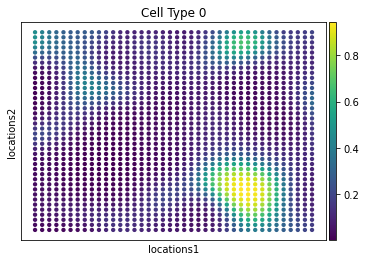

In [9]:
sc.pl.embedding(st_adata, basis="locations", color="Cell Type 0")

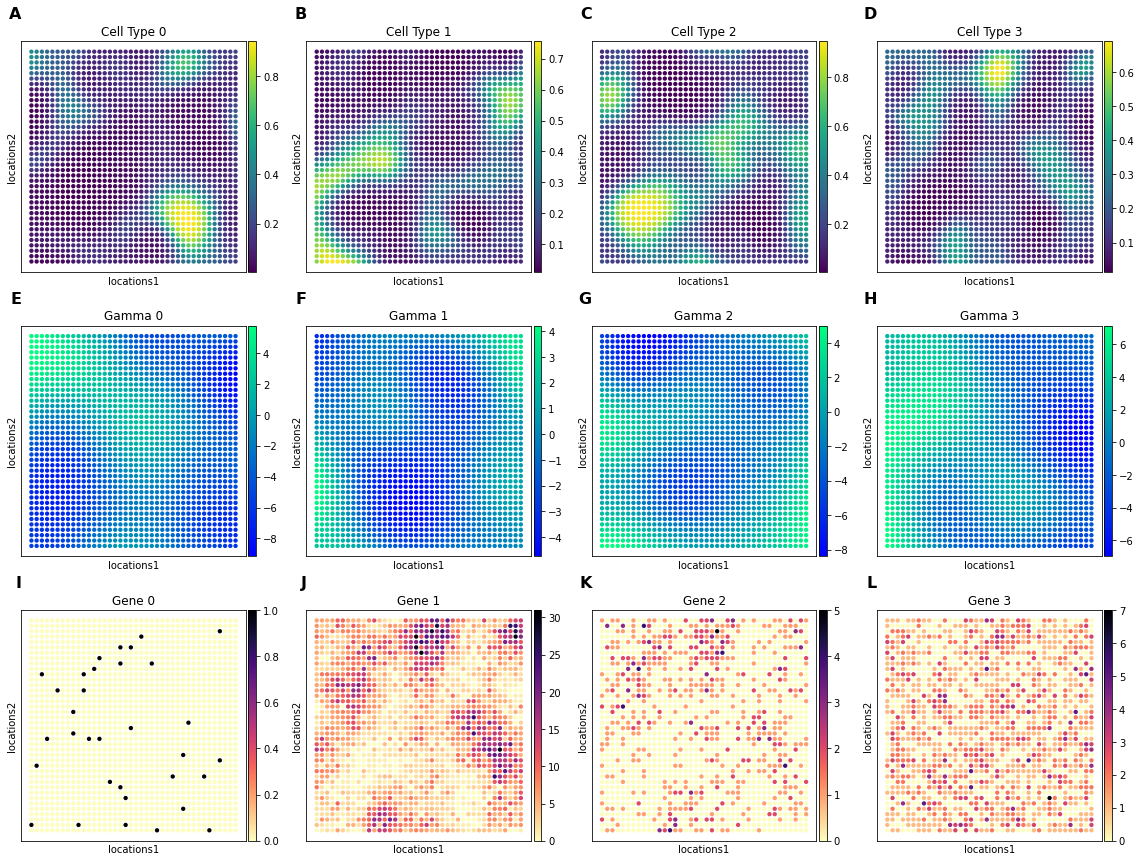

In [10]:
fig, axes = plt.subplots(3, 4, figsize=(16, 12))

letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M']

sc.pl.embedding(st_adata, basis="locations", color="Cell Type 0", ax=axes[0, 0], show=False)
sc.pl.embedding(st_adata, basis="locations", color="Cell Type 1", ax=axes[0, 1], show=False)
sc.pl.embedding(st_adata, basis="locations", color="Cell Type 2", ax=axes[0, 2], show=False)
sc.pl.embedding(st_adata, basis="locations", color="Cell Type 3", ax=axes[0, 3], show=False)

sc.pl.embedding(st_adata, basis="locations", color="Gamma 0", ax=axes[1, 0], show=False, cmap="winter")
sc.pl.embedding(st_adata, basis="locations", color="Gamma 1", ax=axes[1, 1], show=False, cmap="winter")
sc.pl.embedding(st_adata, basis="locations", color="Gamma 2", ax=axes[1, 2], show=False, cmap="winter")
sc.pl.embedding(st_adata, basis="locations", color="Gamma 3", ax=axes[1, 3], show=False, cmap="winter")

sc.pl.embedding(st_adata, basis="locations", color="Gene 0", ax=axes[2, 0], show=False, cmap="magma_r")
sc.pl.embedding(st_adata, basis="locations", color="Gene 1", ax=axes[2, 1], show=False, cmap="magma_r")
sc.pl.embedding(st_adata, basis="locations", color="Gene 2", ax=axes[2, 2], show=False, cmap="magma_r")
sc.pl.embedding(st_adata, basis="locations", color="Gene 3", ax=axes[2, 3], show=False, cmap="magma_r")

for i, slice_axes in enumerate(axes):
    for j, ax in enumerate(slice_axes):
        ax.text(0, 1.15, letters[4 * i+ j] , transform=ax.transAxes,
            fontsize=16, fontweight='bold', va='top', ha='right')

plt.tight_layout()
plt.show()

In [11]:
sc.pp.normalize_total(sc_adata, target_sum=1e5)
sc.pp.log1p(sc_adata)
sc.tl.pca(sc_adata, svd_solver='arpack', n_comps=100)
sc.pp.neighbors(sc_adata, n_neighbors=10, n_pcs=100)
sc.tl.umap(sc_adata)

/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [14]:
sc_adata.obs["cell_type_string"] = [str(i) for i in sc_adata.obs["cell_type"]]
sc_adata.obs["4th_sub-cell_type_string"] = [str(i) for i in sc_adata.obs["4th_sub-cell_type"]]
sc_adata.obs["8th_sub-cell_type_string"] = [str(i) for i in sc_adata.obs["8th_sub-cell_type"]]

/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'cell_type_string' as categorical
/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing '4th_sub-cell_type_string' as categorical
/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Ca

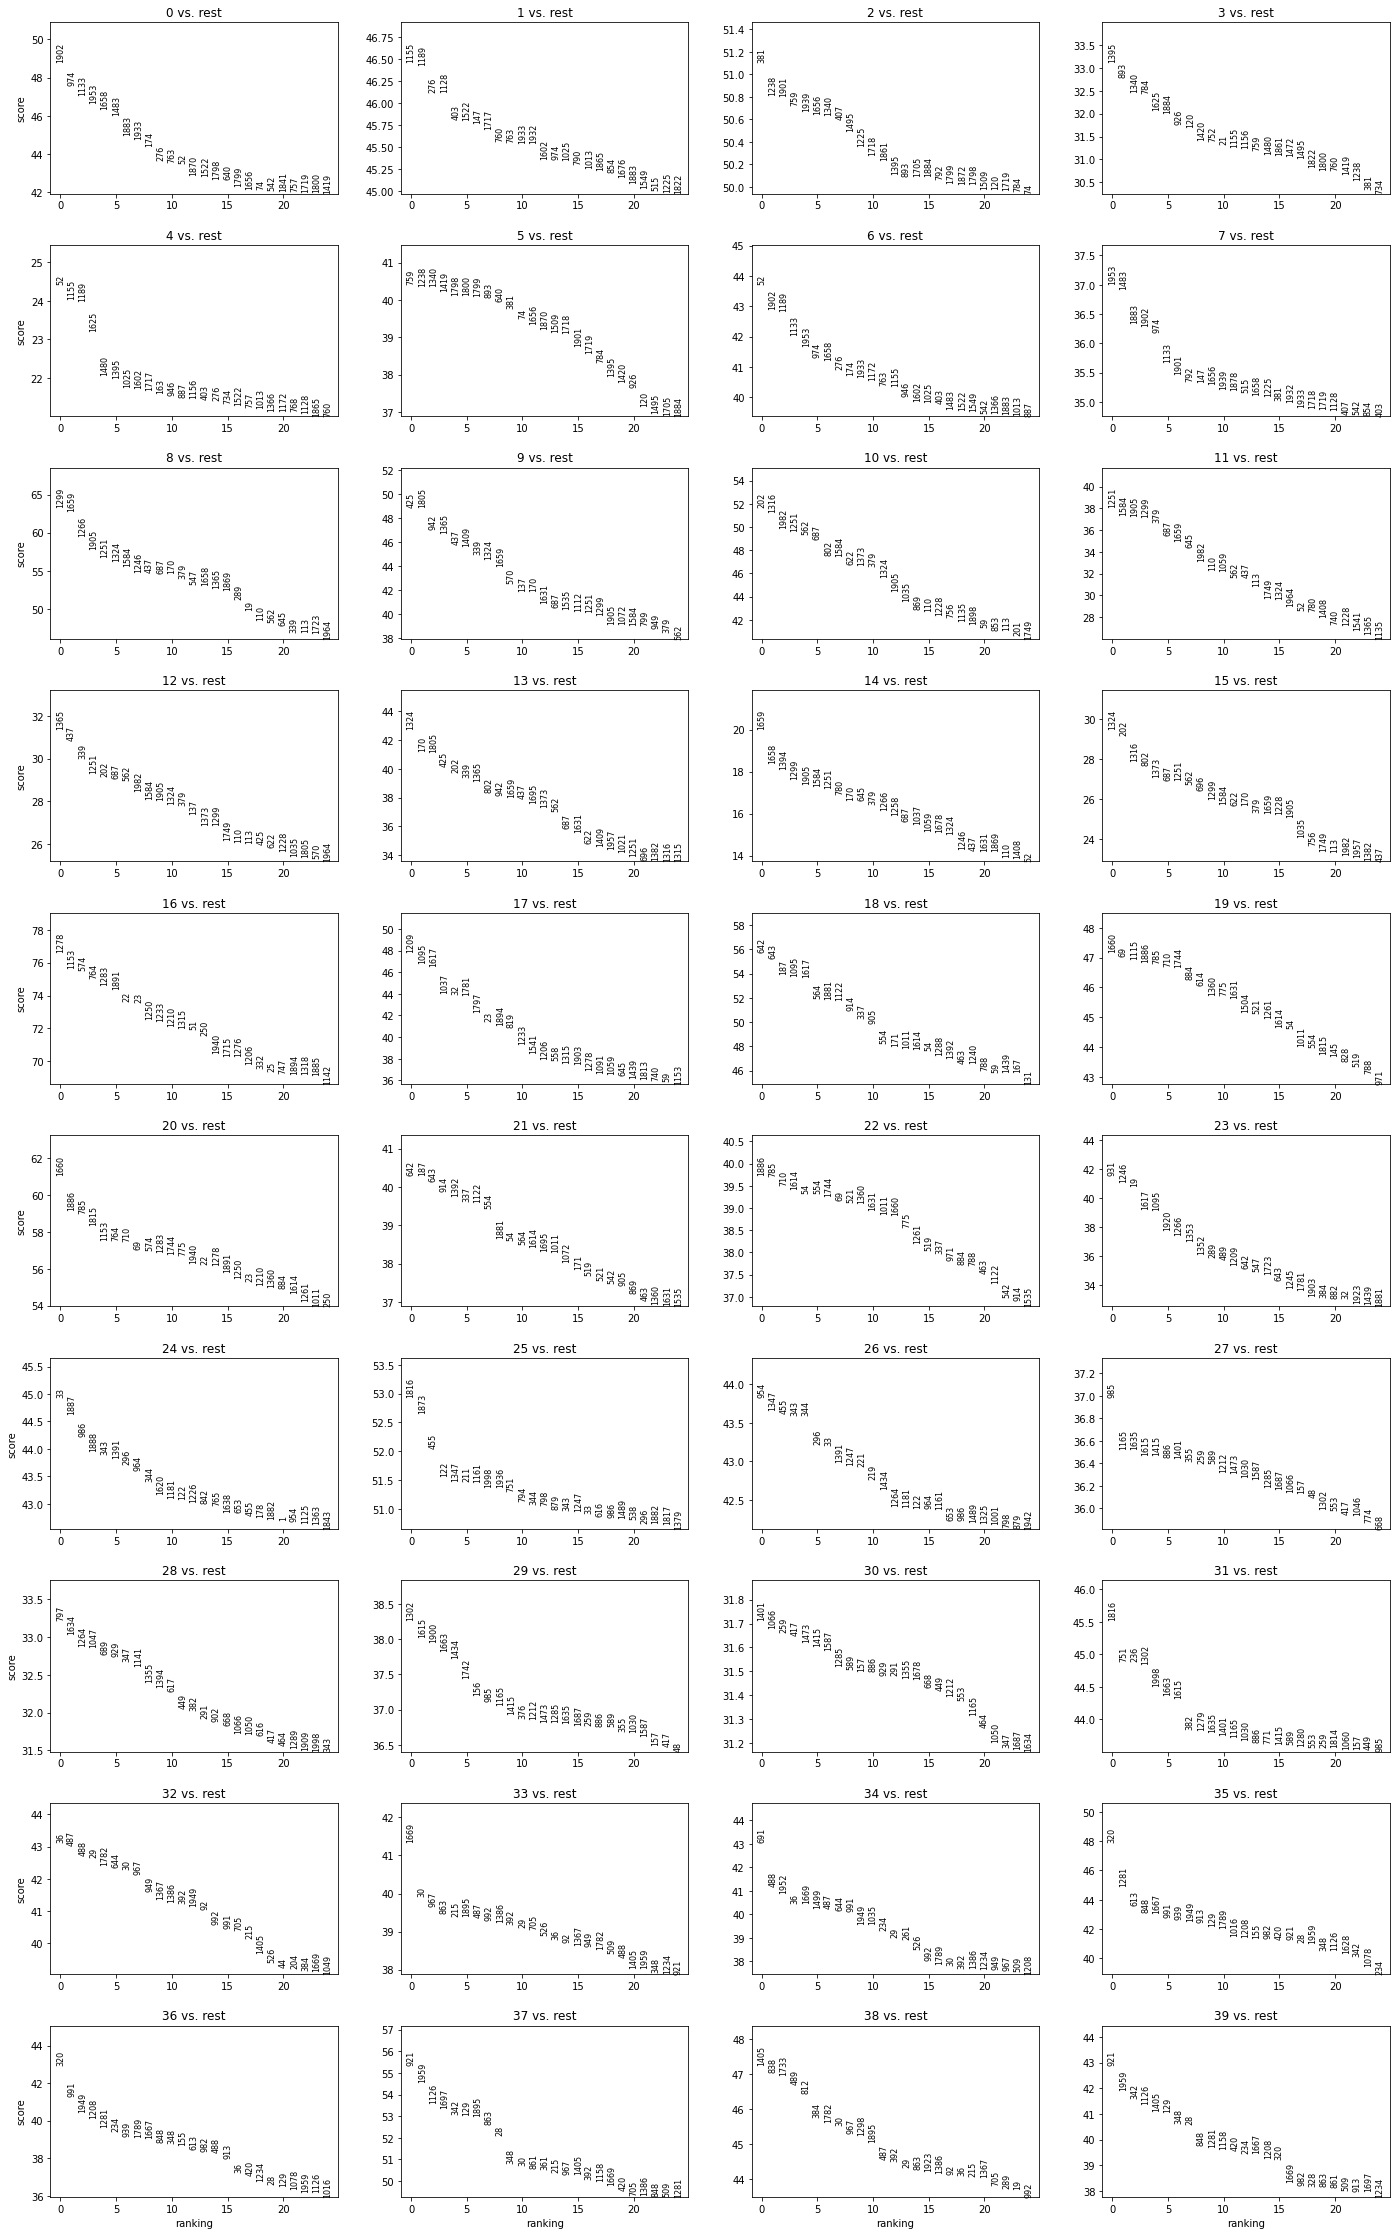

In [15]:
sc.tl.rank_genes_groups(sc_adata, '8th_sub-cell_type_string', method='wilcoxon', key_added = "t-test")
sc.pl.rank_genes_groups(sc_adata, n_genes=25, sharey=False, key = "t-test")

/tmp/ipykernel_97339/3827381133.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


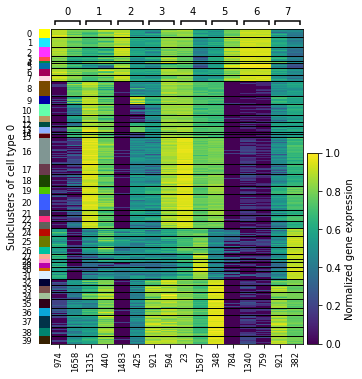

In [16]:
ind_ = ["974", "1658", "1315", "440", 
                           "1483", "425", "921", "594", 
                           "23", "1587", "348", "784",
                          "1340", "759", "921", "382"]
ax = sc.pl.heatmap(sc_adata, ind_, 
                    groupby="8th_sub-cell_type_string", standard_scale="var", show=False,
                   var_group_positions=[[i, i+1] for i in (0, 2, 4, 6, 8, 10, 12, 14)],
                          var_group_labels=[f'{i}' for i in range(8)])
ax["groupby_ax"].set_ylabel("Subclusters of cell type 0")
ax["heatmap_ax"].images[-1].colorbar.ax.set_ylabel("Normalized gene expression")
plt.tight_layout()
plt.show()

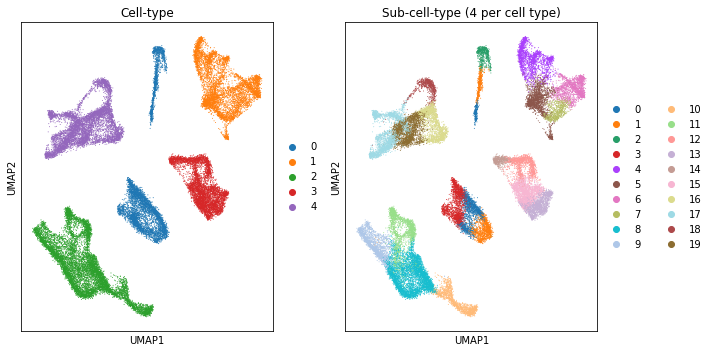

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sc.pl.umap(sc_adata, color=["cell_type_string"], cmap="tab20", ax=axs[0], show=False)
axs[0].set_title("Cell-type")
sc.pl.umap(sc_adata, color=["4th_sub-cell_type_string"], cmap="tab20", ax=axs[1], show=False)
axs[1].set_title("Sub-cell-type (4 per cell type)")
plt.tight_layout()
# plt.savefig("figures/simu_umap.pdf", dpi=300)

In [18]:
sc.pp.normalize_total(st_adata, target_sum=1e5)
sc.pp.log1p(st_adata)
sc.tl.pca(st_adata, svd_solver='arpack')
sc.pp.neighbors(st_adata, n_neighbors=10)
sc.tl.umap(st_adata)

In [20]:
st_adata.obs

,Cell Type 0,Cell Type 1,Cell Type 2,Cell Type 3,Cell Type 4,Gamma 0,Gene 0,Gamma 1,Gene 1,Gamma 2,Gene 2,Gamma 3,Gene 3
0,0.026415,0.627867,0.230568,0.076389,0.038761,-5.467154,0.0,2.194273,0.0,4.999052,0.0,7.097369,0.0
1,0.034712,0.653971,0.186508,0.079607,0.045202,-5.563725,1.0,2.307392,4.0,4.464497,0.0,7.152935,1.0
2,0.045474,0.653928,0.164738,0.083344,0.052516,-5.680593,0.0,2.487272,1.0,3.863657,2.0,7.155053,1.0
3,0.054483,0.635668,0.163021,0.087365,0.059463,-5.817169,0.0,2.720653,1.0,3.225225,0.0,7.103592,1.0
4,0.057343,0.607938,0.179466,0.091131,0.064122,-5.967758,0.0,2.990111,2.0,2.580670,0.0,7.003364,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.111422,0.332227,0.217807,0.274196,0.064349,-7.966712,0.0,3.126191,11.0,-0.348044,1.0,-1.633367,1.0
1596,0.126365,0.247432,0.201232,0.329945,0.095026,-7.231567,0.0,3.179208,19.0,0.195195,0.0,-1.523782,3.0
1597,0.149029,0.174966,0.187765,0.340509,0.147733,-6.358112,0.0,3.189961,17.0,0.761183,0.0,-1.416566,0.0
1598,0.174393,0.121174,0.183389,0.295947,0.225098,-5.377515,0.0,3.166562,14.0,1.326475,0.0,-1.290852,0.0


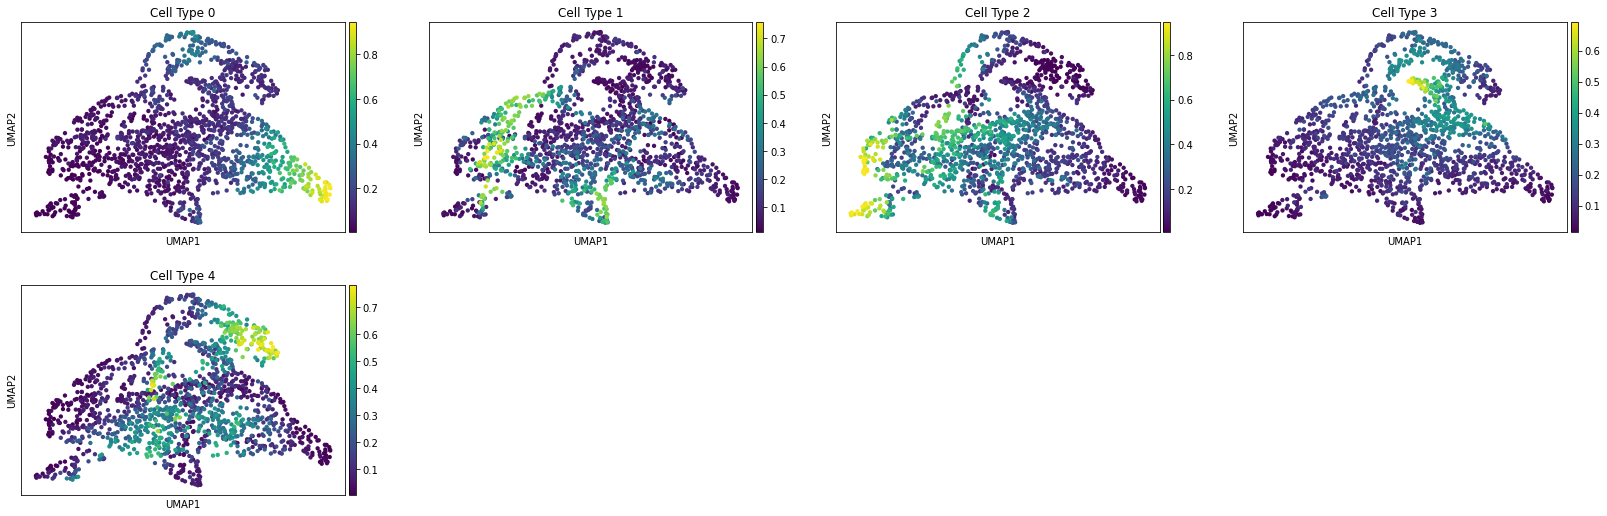

In [22]:
# fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sc.pl.umap(st_adata, color=["Cell Type 0","Cell Type 1","Cell Type 2","Cell Type 3","Cell Type 4"])

In [24]:
st_adata.X.shape

(1600, 2000)

In [25]:
sc_adata.write(path + "sc_simu_processed.h5ad")
st_adata.write(path + "st_simu_processed.h5ad")